In [174]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [175]:
df=pd.read_csv("/content/Train (1).csv")

In [176]:
df.head()

,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch,MatchWinner
0,5,4,37,4,Home,Away,Second,First,Dec,4
1,1,14,84,7,Neutral,Neutral,First,Second,Sep,1
2,9,15,47,9,Home,Away,First,Second,Feb,9
3,7,2,102,6,Home,Away,First,Second,Aug,2
4,6,8,46,5,Home,Away,First,Second,Aug,6


In [177]:
le = LabelEncoder()
df['Team1_Venue'] = le.fit_transform(df['Team1_Venue'])
df['Team2_Venue'] = le.fit_transform(df['Team2_Venue'])
df['Team1_Innings'] = le.fit_transform(df['Team1_Innings'])
df['Team2_Innings'] = le.fit_transform(df['Team2_Innings'])
df['MonthOfMatch'] = le.fit_transform(df['MonthOfMatch'])
df.head()

,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch,MatchWinner
0,5,4,37,4,1,0,1,0,2,4
1,1,14,84,7,2,2,0,1,11,1
2,9,15,47,9,1,0,0,1,3,9
3,7,2,102,6,1,0,0,1,1,2
4,6,8,46,5,1,0,0,1,1,6


In [178]:
features = df.drop('MatchWinner', axis=1)
labels = df['MatchWinner']
print(features.head())
print("\n\n")
print(labels.head())

   Team1  Team2  Stadium  HostCountry  Team1_Venue  Team2_Venue  \
0      5      4       37            4            1            0   
1      1     14       84            7            2            2   
2      9     15       47            9            1            0   
3      7      2      102            6            1            0   
4      6      8       46            5            1            0   

   Team1_Innings  Team2_Innings  MonthOfMatch  
0              1              0             2  
1              0              1            11  
2              0              1             3  
3              0              1             1  
4              0              1             1  



0    4
1    1
2    9
3    2
4    6
Name: MatchWinner, dtype: int64


In [179]:
labels.unique()

array([ 4,  1,  9,  2,  6,  5, 13, 14, 10, 12, 15,  3,  0,  7, 11,  8])

In [180]:
# scaler = StandardScaler()
# features = scaler.fit_transform(features)

In [181]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [182]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [183]:
X_test

,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch
2121,12,13,26,12,1,0,0,1,3
56,7,10,16,3,2,2,0,1,11
2480,4,9,138,0,2,2,1,0,4
1292,11,9,50,11,1,0,0,1,8
1599,5,14,2,0,2,2,0,1,2
...,...,...,...,...,...,...,...,...,...
670,1,14,20,0,1,0,1,0,4
1116,6,0,46,5,1,0,0,1,5
564,4,13,149,9,2,2,0,1,7
2415,12,10,26,12,1,0,1,0,3


In [184]:
y_test

2121    12
56      10
2480     4
1292     9
1599     5
        ..
670     14
1116     6
564     13
2415    12
695      7
Name: MatchWinner, Length: 502, dtype: int64

In [185]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2006, 9)
(502, 9)
(2006,)
(502,)


In [186]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model=Sequential([
    Dense(units=256,activation='relu'),
    Dense(units=128,activation='relu'),
    Dense(units=64,activation='relu'),
    Dense(units=16,activation='linear')
])

In [187]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [188]:
model.compile(optimizer='Adam',loss=SparseCategoricalCrossentropy(from_logits=True),metrics='Accuracy')

In [189]:
history= model.fit(X_train,y_train,epochs=300)

Epoch 1/300
63/63 [==============================] - 1s 3ms/step - loss: 2.7325 - Accuracy: 0.1859
Epoch 2/300
63/63 [==============================] - 0s 3ms/step - loss: 2.3004 - Accuracy: 0.2283
Epoch 3/300
63/63 [==============================] - 0s 4ms/step - loss: 2.1936 - Accuracy: 0.2542
Epoch 4/300
63/63 [==============================] - 0s 4ms/step - loss: 2.1447 - Accuracy: 0.2802
Epoch 5/300
63/63 [==============================] - 0s 4ms/step - loss: 2.0419 - Accuracy: 0.3106
Epoch 6/300
63/63 [==============================] - 0s 4ms/step - loss: 2.0054 - Accuracy: 0.3210
Epoch 7/300
63/63 [==============================] - 0s 4ms/step - loss: 1.9853 - Accuracy: 0.3255
Epoch 8/300
63/63 [==============================] - 0s 4ms/step - loss: 1.9363 - Accuracy: 0.3435
Epoch 9/300
63/63 [==============================] - 0s 5ms/step - loss: 1.8996 - Accuracy: 0.3504
Epoch 10/300
63/63 [==============================] - 0s 5ms/step - loss: 1.8377 - Accuracy: 0.3779
Epoch 11/

In [190]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Predictions and evaluation metrics
y_pred_logits = model.predict(X_test)
y_pred = np.argmax(y_pred_logits, axis=1)

# Classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

16/16 [==============================] - 0s 3ms/step - loss: 3.3337 - Accuracy: 0.5139
Test Accuracy: 0.5139442086219788
16/16 [==============================] - 0s 2ms/step
[[ 3  1  0  0  0  0  1  0  0  0  0  0  0  0  1  1]
 [ 1 56  1  0  2  0  0  1  0  0  0  0  2  0  2  1]
 [ 0  0  7  0  0  2  0  0  0  0  0  0  1  0  1  1]
 [ 0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  2  0 29  4  1  0  1  2  1  0  0  1  2  0]
 [ 0  4  1  0  3 28  0  0  0  2  7  1  1  9  4  3]
 [ 0  1  0  1  0  1  1  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  1  3  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  1  1  0  0  1  0  0  0]
 [ 0 10  0  0  5  4  1  0  0 18  8  0  1  3  3  1]
 [ 0  4  1  0  0  4  2  0  0  4 39  0  2  0  2  0]
 [ 0  2  0  1  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  5  0  0  2  0  0  0  0  0  4  0 24  2  5  1]
 [ 0  6  0  0  2  1  0  0  0  5  7  0  5 24  4  2]
 [ 0  7  1  0  2  5  0  0  0  0  8  0  3  8 14  0]
 [ 1  1  3  0  2  1  0  0  0  1  0  0  2  2  3 10]]
         

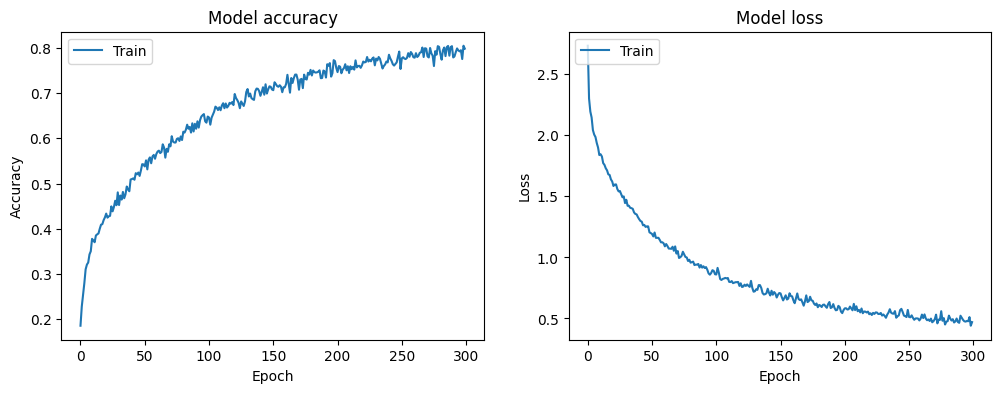

In [191]:
# Plot training history
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['Accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **NOW EVALUATING ON LAST 30 ROWS OF DATASET GIVEN**

In [192]:
X_test_1= features[-31:-1]
y_test_1= labels[-31:-1]
print(X_test_1)
print(y_test_1)

      Team1  Team2  Stadium  HostCountry  Team1_Venue  Team2_Venue  \
2477     10     13      130           14            2            2   
2478      9     14      138            0            2            2   
2479      4      1       88            3            1            0   
2480      4      9      138            0            2            2   
2481     14      2       11           15            1            0   
2482      9      4      149            9            1            0   
2483      5     12       75            4            1            0   
2484      6     10       12            5            1            0   
2485      2     12       16            3            2            2   
2486     13     14       76           10            2            2   
2487     13     10       36           13            1            0   
2488     15      5       22           16            1            0   
2489     13     15      130           14            2            2   
2490      5     15  

In [193]:
# Predictions and evaluation metrics
y_pred_logits_1 = model.predict(X_test_1)
y_pred_1 = np.argmax(y_pred_logits_1, axis=1)

# Classification report
print(confusion_matrix(y_test_1, y_pred_1))
print(classification_report(y_test_1, y_pred_1))

1/1 [==============================] - 0s 33ms/step
[[6 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 2 0 2 0 0 0 0 0]
 [0 0 1 2 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0]
 [1 0 0 0 0 1 0 2 0 0]
 [0 0 0 0 0 1 0 0 3 0]
 [0 0 0 0 0 0 1 0 0 1]]
              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       0.00      0.00      0.00         1
           4       0.67      0.50      0.57         4
           5       1.00      0.67      0.80         3
           9       0.50      1.00      0.67         2
          10       0.33      1.00      0.50         1
          12       0.75      1.00      0.86         3
          13       1.00      0.50      0.67         4
          14       0.75      0.75      0.75         4
          15       1.00      0.50      0.67         2

    accuracy                           0.73        30
   macro avg       0.69      0.69      0.64        30
weighted avg 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
